In [3]:
# Cell 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Cell 2: Load the dataset and preview the first few rows
df = pd.read_csv('house_price_regression_dataset.csv')
df.head()



,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [5]:
# Cell 3: Check for missing values and duplicates
print(df.isnull().sum())  # Check for missing values
print(df.duplicated().sum())  # Check for duplicate rows


Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64
0


In [6]:
# Cell 4: Split the data into features (X) and target (y)
X = df.iloc[:, :7]  # Assume the first 7 columns are features
y = df.iloc[:, -1]  # Assume the last column is the target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(800, 7)
(800,)
(200, 7)
(200,)


In [7]:
# Cell 5: Feature scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print scaled features to verify
print(X_train_scaled)
print(X_test_scaled)


[[ 1.50468858  1.40072672 -1.19206914 ... -1.27576241  1.23075085
  -0.93938259]
 [ 0.10729742 -0.699051    1.25006995 ...  0.93916537 -1.25247911
  -1.28698022]
 [ 0.92026749  0.70080081  0.0290004  ... -0.79493085  1.23075085
  -0.93938259]
 ...
 [-1.66810901 -1.3989769  -1.19206914 ... -0.35348935  1.23075085
  -0.59178496]
 [ 0.18558928 -1.3989769   0.0290004  ...  0.93402247  1.23075085
   0.10341029]
 [ 1.1496073   0.70080081  0.0290004  ...  1.25993293 -1.25247911
  -0.59178496]]
[[ 0.55648711  1.40072672  1.25006995 ...  0.25431199  1.23075085
   0.45100792]
 [ 0.34375467 -0.699051   -1.19206914 ...  0.8878311   1.23075085
  -1.63457785]
 [ 1.1322091   1.40072672  1.25006995 ... -0.11419294  1.23075085
   0.10341029]
 ...
 [ 0.49243013  1.40072672 -1.19206914 ... -0.79971851 -0.01086413
   0.79860555]
 [ 0.51061915  1.40072672 -1.19206914 ... -1.35755779  1.23075085
  -1.28698022]
 [-0.4897769   0.70080081  1.25006995 ...  0.81097175  1.23075085
  -0.93938259]]


In [8]:
# Cell 6: Train the linear regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict the house prices for the test set
y_pred = lr.predict(X_test_scaled)


In [9]:
# Cell 7: Evaluate model using MSE, MAE, R2, and RMSE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_Score = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2 Score: {r2_Score}')
print(f'RMSE: {rmse}')


MSE: 90139188.64127246
MAE: 7644.422269790929
R2 Score: 0.9984195984534743
RMSE: 9494.166031899404


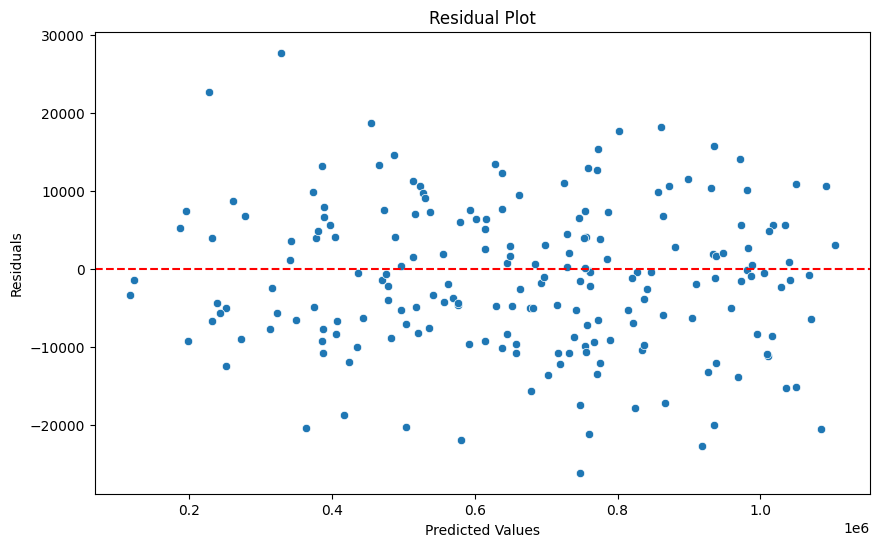

In [10]:
# Cell 8: Plot the residuals to check how well the model fits
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


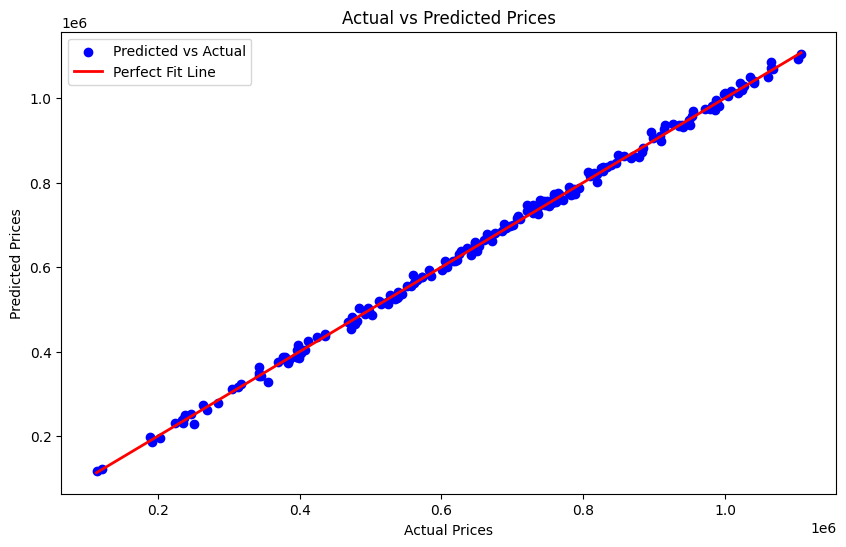

In [11]:
# Cell 9: Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Fit Line')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()


In [12]:
# Cell 10: Define the Linear Regression class from scratch
class LRScratch:
    
    def __init__(self):
        self.intercept_ = None
        self.coef_ = None
        
    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis=1)
        beta = np.linalg.inv(np.dot(X_train.T, X_train)).dot(np.dot(X_train.T, y_train))
        self.intercept_ = beta[0]
        self.coef_ = beta[1:]
        
    def predict(self, X_test):
        y_pred = self.intercept_ + np.dot(X_test, self.coef_)
        return y_pred

lr_scratch = LRScratch()
lr_scratch.fit(X_train_scaled, y_train)

# Make predictions
y_pred_scratch = lr_scratch.predict(X_test_scaled)


In [13]:
# Cell 11: Evaluate the manually implemented linear regression model
mse_scratch = mean_squared_error(y_test, y_pred_scratch)
mae_scratch = mean_absolute_error(y_test, y_pred_scratch)
r2_Score_scratch = r2_score(y_test, y_pred_scratch)
rmse_scratch = np.sqrt(mse_scratch)

print(f'MSE (Scratch): {mse_scratch}')
print(f'MAE (Scratch): {mae_scratch}')
print(f'R2 Score (Scratch): {r2_Score_scratch}')
print(f'RMSE (Scratch): {rmse_scratch}')


MSE (Scratch): 90139188.64127155
MAE (Scratch): 7644.422269790892
R2 Score (Scratch): 0.9984195984534744
RMSE (Scratch): 9494.166031899354


In [14]:
# Cell 12: Compare the performance of both models (SKLearn vs Scratch)
comparison = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'R2 Score', 'RMSE'],
    'Sklearn Linear Regression': [mse, mae, r2_Score, rmse],
    'Scratch Linear Regression': [mse_scratch, mae_scratch, r2_Score_scratch, rmse_scratch]
})
print(comparison)


     Metric  Sklearn Linear Regression  Scratch Linear Regression
0       MSE               9.013919e+07               9.013919e+07
1       MAE               7.644422e+03               7.644422e+03
2  R2 Score               9.984196e-01               9.984196e-01
3      RMSE               9.494166e+03               9.494166e+03


In [16]:
# Asking the user for input values for all features
print("Please enter the following feature values for house price prediction:")

# Assuming there are 7 features based on the dataset
feature_1 = float(input("Enter value for Feature 1: "))
feature_2 = float(input("Enter value for Feature 2: "))
feature_3 = float(input("Enter value for Feature 3: "))
feature_4 = float(input("Enter value for Feature 4: "))
feature_5 = float(input("Enter value for Feature 5: "))
feature_6 = float(input("Enter value for Feature 6: "))
feature_7 = float(input("Enter value for Feature 7: "))

# Combine inputs into a NumPy array
user_input = np.array([[feature_1, feature_2, feature_3, feature_4, feature_5, feature_6, feature_7]])

# Scale the input features (using the scaler fitted during training)
user_input_scaled = scaler.transform(user_input)

# Predict house price using the trained model
predicted_price = lr.predict(user_input_scaled)

# Display the predicted price
print(f"\nPredicted House Price: ${predicted_price[0]:.2f}")


Please enter the following feature values for house price prediction:

Predicted House Price: $478275.59


c:\Users\Monther\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
